In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import sympy as sym
import warnings
import pickle as plk
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

## Q1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

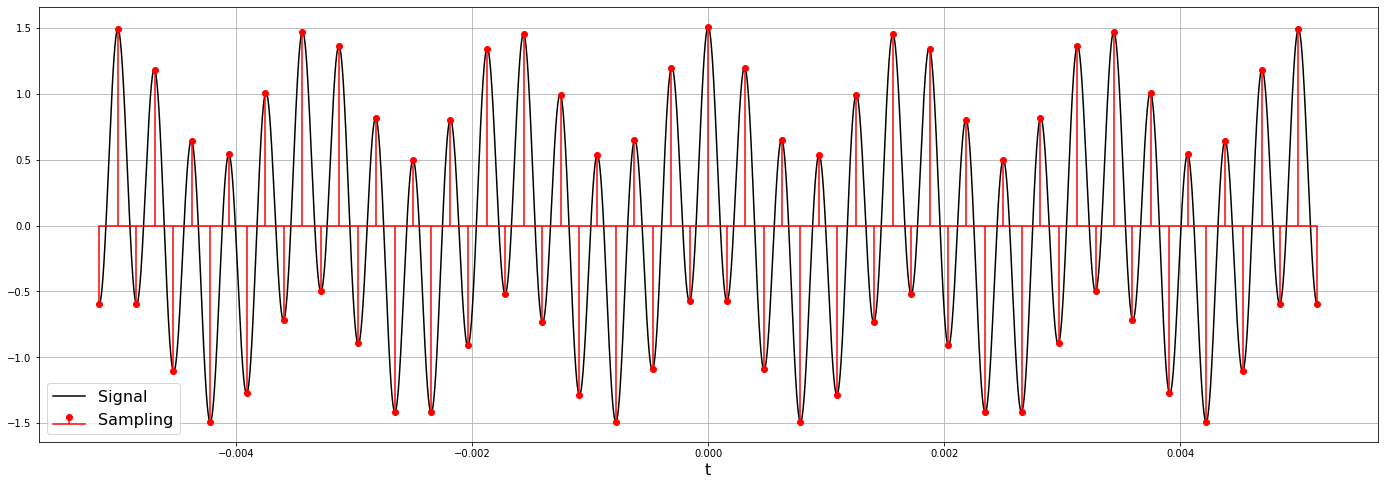

In [233]:
tlimits = [-33/6400,33/6400]

#tpoints = 1000
Fs = 3200*2
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = np.cos(2*np.pi*3200*t1) + 0.5*np.cos(2*np.pi*600*t1) + 0.01*np.cos(2*np.pi*300*t1) # Sampled signal

t2 = np.linspace(tlimits[0],tlimits[1],100*tpoints)
x2 = np.cos(2*np.pi*3200*t2) + 0.5*np.cos(2*np.pi*600*t2) + 0.01*np.cos(2*np.pi*300*t2) # Continuous signal

plt.figure(figsize=(24,8))
plt.grid(True)
plt.plot(t2,x2,'black', label = 'Signal')
markerline, stemline, baseline = plt.stem(t1,x1,'red',label = 'Sampling')
baseline.set_color('red')
markerline.set_color('red')
plt.xlabel("t",fontsize=16)
plt.legend(fontsize=16)

warnings.filterwarnings("ignore")

display(Math('F_{s} = %5.0f, ~~~~~ T_{s} = %5.6f ms' %(Fs, 1e3/Fs)))
display(Math('tPoints = %5.0f, ~~~~~ Time~period = %5.4f ms' %(tpoints,(tlimits[1]-tlimits[0])*1e3)))

## Q2

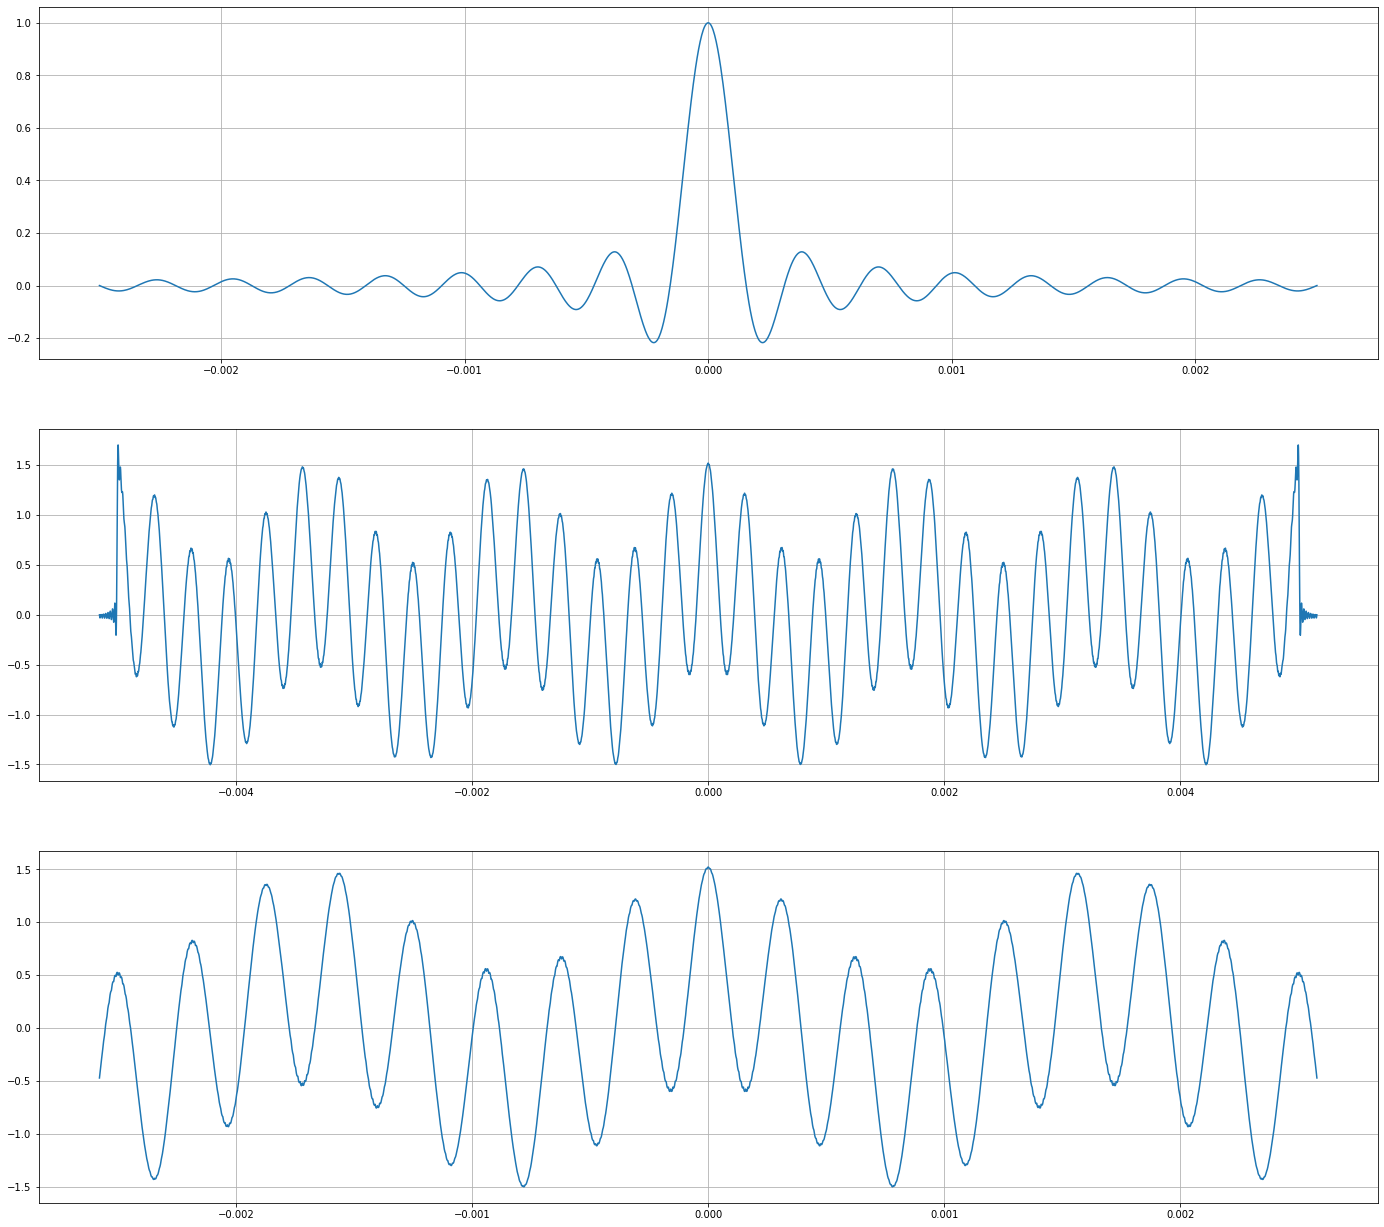

In [244]:
rIncrease = 16 # Range increase
hRange = 16 # Sinc range (in T)
hPoints = 1600 # Sinc points

figure,ax=plt.subplots(3, 1,figsize=(24,22))

increment = int((tlimits[1]-tlimits[0])*(rIncrease/2))
t1inc = np.linspace(tlimits[0]-increment, tlimits[1]+increment, rIncrease*tpoints)
x1inc = np.cos(2*np.pi*3200*t1inc) + 0.5*np.cos(2*np.pi*600*t1inc) + 0.01*np.cos(2*np.pi*300*t1inc) # Sampled signal incremented

th = np.linspace(-hRange*(1/Fs),hRange*(1/Fs),hPoints)
h = np.sin(np.pi*th*Fs)/(np.pi*th*Fs)
ax[0].grid(True)
ax[0].plot(th,h)

totpoints = int(hPoints + (rIncrease*tpoints- 2*hRange - 1)*(hPoints)/(2*hRange))
tr = np.linspace(tlimits[0]-increment, tlimits[1]+increment ,totpoints)
xi = np.zeros(totpoints)
xr = np.zeros(totpoints)

for i in range(rIncrease*tpoints- 2*hRange):
    xi1 = int(i*(hPoints)/(2*hRange))           # Left limit of xi
    xi2 = int(hPoints + i*(hPoints)/(2*hRange)) # Right limit of xi
    #print('xi1={:.2f}, xi2={:.2f}, i={:.2f}, totpoints={:.2f}'.format(xi1,xi2,i,totpoints))
    xi = np.zeros(totpoints)
    xi[xi1:xi2] = x1inc[i+hRange]*h
    xr = xr + xi 

ax[1].grid(True)
ax[1].plot(tr,xr)

dFactor = 2 # Decrement factor
decrement = int(totpoints/2 - totpoints/(2*dFactor))
x3 = xr[decrement : totpoints-decrement]
t3 = tr[decrement : totpoints-decrement]
ax[2].grid(True)
ax[2].plot(t3,x3)